CIS 9 - Lab 4: NLP

In [635]:
# Name: Srinivas Jakkula

There are 2 different NLP tasks in this lab. They are in cells numbered 1a - 1m, and 2a - 2h
<br>There are more steps in question 1 because each step is one logical block of code to guide you. For task 2, you answer the question by creating the steps on your own.

1. Use NLTK to build a model that analyzes tweets and determine if they're racist/sexist or not. There are 2 input files _train.csv_ and _test.csv_ from [source](https://www.kaggle.com/arkhoshghalb/twitter-sentiment-analysis-hatred-speech).
<br>In the train.csv file the label 0 means the tweet is not racist/sexist, and the label 1 means the tweet is racist/sexist. In test.csv there are only the tweets.

1a. Read data from train.csv into a DataFrame, print the size of the DataFrame and the first few lines of data.
<br>This data will be used to train the model, as its name implies.

In [636]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import random
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import nltk
from sklearn.metrics import f1_score

data = pd.read_csv("train.csv")
#print(data, '\n')
print(data.shape, "\n")
print(data.head())


(31962, 3) 

   id  label                                              tweet
0   1      0   @user when a father is dysfunctional and is s...
1   2      0  @user @user thanks for #lyft credit i can't us...
2   3      0                                bihday your majesty
3   4      0  #model   i love u take with u all the time in ...
4   5      0             factsguide: society now    #motivation


1b. First get an overview of the data by finding the percentage of _'good'_ tweets (not racist/sexist) and the percentage of _'bad'_ tweets (racist/sexist). This helps us determine if there is enough representation of both types in the dataset.
<br>Print the percentages.

In [637]:
#data.describe()
# Method 1
print(data.count().label)
print(data.groupby(by='label').agg('count').id[0])
print(data.groupby(by='label').agg('count').id[1])
print(f"Good tweets {(data.groupby(by='label').agg('count').id[0]/data.count().label):.2%}")
print(f"Bad tweets {(data.groupby(by='label').agg('count').id[1]/data.count().label):.2%}")

# good_t = data.groupby(by='label')
# Method 2
good_t = data[data['label'] == 0] 
bad_t = data[data['label'] == 1]
print(good_t.shape)
print(bad_t.shape)
print(len(good_t))
print(f"Good tweets {len(good_t)/len(data):.2%}")
print(f"Bad tweets {len(bad_t)/len(data):.2%}")
print(good_t)

# badfreqD = nltk.FreqDist(badHashtags)

31962
29720
2242
Good tweets 92.99%
Bad tweets 7.01%
(29720, 3)
(2242, 3)
29720
Good tweets 92.99%
Bad tweets 7.01%
          id  label                                              tweet
0          1      0   @user when a father is dysfunctional and is s...
1          2      0  @user @user thanks for #lyft credit i can't us...
2          3      0                                bihday your majesty
3          4      0  #model   i love u take with u all the time in ...
4          5      0             factsguide: society now    #motivation
...      ...    ...                                                ...
31956  31957      0  off fishing tomorrow @user carnt wait first ti...
31957  31958      0  ate @user isz that youuu?ðððððð...
31958  31959      0    to see nina turner on the airwaves trying to...
31959  31960      0  listening to sad songs on a monday morning otw...
31961  31962      0                   thank you @user for you follow  

[29720 rows x 3 columns]


1c. The hashtag denotes special meaning or theme in the tweet, so you'll use them to do a quick check of the labeling of the training data. Find and plot the 10 most used hashtags for the good tweets. The plot should show the hashtags and their counts.
<br>In case anyone needs a refresher, a hashtag is a word that begins with '#' followed by letters. In line 4 of the DataFrame is the hashtag #model

#love           1531
#positive        874
#healthy         570
#smile           548
#thankful        491
#fun             434
#life            405
#summer          367
#model           364
#affirmation     363
Name: 0, dtype: int64


0                                    [#run]
1        [#lyft, #disapointed, #getthanked]
2                                        []
3                                  [#model]
4                             [#motivation]
                        ...                
31956                                    []
31957                                    []
31958                  [#shame, #imwithher]
31959                                    []
31961                                    []
Name: tweet, Length: 29720, dtype: object

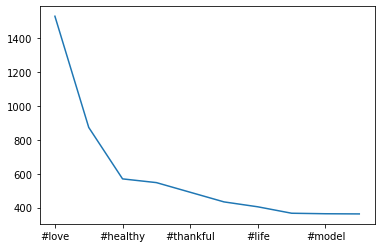

In [638]:
# Working
good_t10 = good_t.tweet.str.extractall(r'(\#\w+)')[0].value_counts()[:10]
print(good_t10)
good_t10.plot()

g = good_t.tweet.str.findall(r'(\#\w+)')
g
#print(good_t)
#print(good_t.tweet.str.extractall(r'(\#\w+)')[0].value_counts())

# badfreqD = nltk.FreqDist(good_t.tweet.str.extractall(r'(\#\w+)')[0].value_counts())
# print(badfreqD)
# badfreqD.plot(10)
#from nltk.tokenize import word_tokenize   # separate text into words

# words = word_tokenize(data)
# print(words)

# from nltk.tokenize import RegexpTokenizer
#data['tweet'].str.extractall(r'(\#\w+)')[0].value_counts()
# data.tweet
#print(data.tweet)
# WORKING
# X = data.drop(columns=['id', 'label'])

# #A = X.tweet.str.extractall(r'(\#\w+)')[0].value_counts()[:10]
# A = X.tweet.str.extractall(r'(\#\w+)')[0].value_counts()[:10]
# print(A)
# A.plot()

# good_tweet = data[data.label == 0]
# print(good_tweet)
# bad_tweet = data[data.label == 1]
# print(good_tweet)
# print(bad_tweet)


# freqD = nltk.FreqDist(A)
# freqD.plot(10)

# Y = data.drop(columns=['id', 'label'])
# tokenizer = RegexpTokenizer(r'(\#\w+)')

# def preprocess(s) :
#     w = tokenizer.tokenize(s)
#     #w = [word for word in w if word not in stop_words]
#     #w = [stemmer.stem(word) for word in w]
#     return ' '.join(w)

# X_processed = pd.Series([preprocess(X.loc[i,'tweet']) for i in range(len(X))]).to_frame()
# X_processed.head()# from nltk.tokenize import RegexpTokenizer

# freqD = nltk.FreqDist(X_processed)
# print(freqD)
# print(len(freqD))
# freqD.plot(10)
# tokenizer = RegexpTokenizer(r'(\#\w+)')   
# only_words = tokenizer.tokenize(X)
# print(only_words)

#freqD = nltk.FreqDist(only_words)

Then find and plot the 10 most used hashtags for the bad tweets.
<br>In addition to all the math, statistics, and programming knowledge, a good data scientist has expertise in the field that they investigate. As someone with knowlege on racism/sexism terms, do the tags seem to agree with the labeling?
<br>Note: if you get a warning about certain characters not being displayed properly, you can ignore the warning. The result of the warning will show in the output but it's okay.

#trump        133
#politics      94
#allahsoil     92
#libtard       76
#liberal       75
#sjw           74
#retweet       57
#black         44
#miamiâ        38
#tampa         32
Name: 0, dtype: int64
13                                [#cnn, #michigan, #tcot]
14       [#australia, #opkillingbay, #seashepherd, #hel...
17                                                      []
23                                                      []
34                                [#neverump, #xenophobia]
                               ...                        
31934                                [#jcpenny, #kentucky]
31946                        [#mailboxpride, #liberalisme]
31947                                                   []
31948                                                   []
31960                     [#sikh, #temple, #calgary, #wso]
Name: tweet, Length: 2242, dtype: object


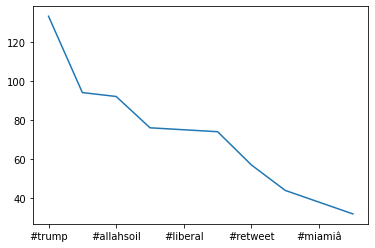

In [639]:
bad_t10 = bad_t.tweet.str.extractall(r'(\#\w+)')[0].value_counts()[:10]
print(bad_t10)
bad_t10.plot()
# bad_t_ten = bad_t.tweet.str.findall(r'(\#\w+)')[0]

b = bad_t.tweet.str.findall(r'(\#\w+)')
print(b)


1d. Create the y variable from the DataFrame.
<br>Print the size of y.

In [640]:
y = data.label
print(y.shape)
print(y.size)

(31962,)
31962


Create the X variable from the DataFrame.
<br>Print the size of X and the first few lines of x.

In [641]:
X = data.tweet
print(X.shape)
print(X.head())
print(type(X))
# replace()

(31962,)
0     @user when a father is dysfunctional and is s...
1    @user @user thanks for #lyft credit i can't us...
2                                  bihday your majesty
3    #model   i love u take with u all the time in ...
4               factsguide: society now    #motivation
Name: tweet, dtype: object
<class 'pandas.core.series.Series'>


1e. To start pre-processing the data, observe that the user names in the tweet start with '@'. A user name in the lines of X above is @user. These user names don't correlate with the labeling so you can remove them from the data.
<br>Remove all @names from the data and show the first few lines of X to see that they're gone.
<br>Hint: vectorized strings can make the job easier.

In [642]:
# tokenizer = RegexpTokenizer(r'(\@\w+)')

# def preprocess(s) :
#     w = tokenizer.tokenize(s)
    
#     w = [word for word in w if word not in stop_words]
#     w = [stemmer.stem(word) for word in w]
#     return ' '.join(w)

# X_processed = pd.Series([preprocess(data.loc[i,'tweet']) for i in range(len(data))]).to_frame()
# print(X_processed.head())
# print("-----")
# print(X_processed[0])
# X_wo_user = data.tweet.str.replace("")
X_m = X.replace(to_replace=r'(\@\w+)', value='',regex=True)
print(type(X_m))
X_m

<class 'pandas.core.series.Series'>


0          when a father is dysfunctional and is so sel...
1          thanks for #lyft credit i can't use cause th...
2                                      bihday your majesty
3        #model   i love u take with u all the time in ...
4                   factsguide: society now    #motivation
                               ...                        
31957    ate  isz that youuu?ððððððð...
31958      to see nina turner on the airwaves trying to...
31959    listening to sad songs on a monday morning otw...
31960     #sikh #temple vandalised in in #calgary, #wso...
31961                          thank you  for you follow  
Name: tweet, Length: 31962, dtype: object

1f. Continue the pre-processing step by removing non-words, lowercase all words, removing stop words, and stemming the words. Print the resulting X variable. (You can change the variable name X if you want.)

In [643]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

stop_words=set(stopwords.words("english"))
# print(stop_words)


stemmer = PorterStemmer()

# X_m = X.replace(to_replace=r'(\@\w+)', value='new',regex=True)
# X_m
# tokenizer = RegexpTokenizer(r'[^\w]')
#tokenizer = RegexpTokenizer(r'\w+')
tokenizer = RegexpTokenizer(r'[a-zA-Z]+')


def preprocess(s):
    w = tokenizer.tokenize(s.lower())
    w = [word for word in w if word not in stop_words]
    w = [stemmer.stem(word) for word in w]
    return ' '.join(w)

# X_processed = pd.Series([preprocess(data.loc[i,'tweet']) for i in range(len(data))]).to_frame()
X_processed = pd.Series([preprocess(X_m.loc[i]) for i in range(len(X_m))]).to_frame()
X_processed

,0
0,father dysfunct selfish drag kid dysfunct run
1,thank lyft credit use caus offer wheelchair va...
2,bihday majesti
3,model love u take u time ur
4,factsguid societi motiv
...,...
31957,ate isz youuu
31958,see nina turner airwav tri wrap mantl genuin h...
31959,listen sad song monday morn otw work sad
31960,sikh templ vandalis calgari wso condemn act


1g. Convert the strings in X to vectors of numbers. Show the size of the vectors.

In [644]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer()
vect.fit(X_processed[0])
X_vectors = vect.transform(X_processed[0])
print(X_vectors[0])
print(X_vectors.shape)
# print(X_processed[0])

  (0, 7558)	1
  (0, 7824)	2
  (0, 9012)	1
  (0, 14711)	1
  (0, 23484)	1
  (0, 24159)	1
(31962, 31307)


1h. Split the dataset into training and testing sets and Show the size of the sets.

In [645]:
X_train, X_test, y_train, y_test = train_test_split(X_vectors,y,test_size=0.2)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(25569, 31307) (25569,) (6393, 31307) (6393,)


1i. Use the Multinomial Naive Bayes model to train, then test the model.

In [646]:
classifier = MultinomialNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

# f1_score
# score = f1_score(y_pred, y_test)


1j. Show the accuracy of the model by displaying the accuracy score, confusion matrix, and F1 score.

In [647]:
print(metrics.accuracy_score(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred, labels=[0,1]))
print(f1_score(y_pred, y_test, average='weighted'))
print(type(y_test))
print(type(y_pred))

0.9490067261066791
[[5805  145]
 [ 181  262]]
0.9500096836270687
<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>


1k. In your own words:
<br>a. Analyze the accuracy, explaining what each of the 3 values mean.
<br>b. Between the accuracy score and the F1 score, which one should be used, and why? (Hint: this was discussed in the class notes)

In [648]:
# Accuracy score indicates how accuratly it is predicting test data. Here based on the trained data, this model is prediction 94.9% correctly for the test data

# Based on the confusion matrix, this model predicated (True Positives) 5772 value correct when the tweet is related to racist and 189 times detected incorrectly
# Similarly 251 times detected (True negatives) corrected when the tweet is not racist of nature

# Accuracy can be used when the class distribution is similar while F1-score is a better metric when there are imbalanced classes as in the above case.

# Accuracy is used when the True Positives and True negatives are more important while F1-score is used when the False Negatives and False Positives are crucial


1l. Prepare the data in _test.csv_ to test the model. This will take several steps so feel free to create multiple cells as needed. You'll find that separating the steps into different cells help during debugging since you only need to re-run part of the code.

In [649]:
test_data = pd.read_csv("test.csv")
#print(data, '\n')
print(test_data.shape, "\n")
print(test_data.head())

(17197, 2) 

      id                                              tweet
0  31963  #studiolife #aislife #requires #passion #dedic...
1  31964   @user #white #supremacists want everyone to s...
2  31965  safe ways to heal your #acne!!    #altwaystohe...
3  31966  is the hp and the cursed child book up for res...
4  31967    3rd #bihday to my amazing, hilarious #nephew...


In [650]:
X_test = test_data.replace(to_replace=r'(\@\w+)', value='',regex=True)
print(type(X_test))
X_test

<class 'pandas.core.frame.DataFrame'>


,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,#white #supremacists want everyone to see th...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."
...,...,...
17192,49155,thought factory: left-right polarisation! #tru...
17193,49156,feeling like a mermaid ð #hairflip #neverre...
17194,49157,#hillary #campaigned today in #ohio((omg)) &am...
17195,49158,"happy, at work conference: right mindset leads..."


In [651]:
X_test_processed = pd.Series([preprocess(X_test.loc[i, 'tweet']) for i in range(len(X_test))]).to_frame()
X_test_processed

,0
0,studiolif aislif requir passion dedic willpow ...
1,white supremacist want everyon see new bird movi
2,safe way heal acn altwaystoh healthi heal
3,hp curs child book reserv alreadi ye harrypott...
4,rd bihday amaz hilari nephew eli ahmir uncl da...
...,...
17192,thought factori left right polaris trump usele...
17193,feel like mermaid hairflip neverreadi formal w...
17194,hillari campaign today ohio omg amp use word l...
17195,happi work confer right mindset lead cultur de...


In [652]:
vect = CountVectorizer(vocabulary=vect.vocabulary_)
vect.fit(X_test_processed[0])
X_test_vectors = vect.transform(X_test_processed[0])
print(X_test_vectors[0])
print(X_test_vectors.shape)
# print(X_test_processed[0])

  (0, 6670)	1
  (0, 9327)	1
  (0, 20514)	1
  (0, 22892)	1
  (0, 26193)	1
(17197, 31307)


In [653]:
# X_test_train, X_test_test, y_test_train, y_test_test = train_test_split(X_test_vectors,y,test_size=0.2)
# print(X_test_train.shape, y_test_train.shape, X_test_test.shape, y_test_test.shape)
# Xa_train, Xa_test, ya_train, ya_test = train_test_split(X_test_vectors,y,test_size=0)
# print(Xa_train.shape, ya_train.shape, Xa_test.shape, ya_test.shape)

In [654]:
import numpy as np 
#classifier = MultinomialNB()
#classifier.fit(X_train, y_train)
y_test_pred = classifier.predict(X_test_vectors)
print(type(y_test_pred))
print(len(y_test))
print(len(y_pred))
print(y_test_pred)
print(type(y_test))
print(type(y_pred))
np.unique(y_test_pred, return_counts = True)

<class 'numpy.ndarray'>
6393
6393
[0 0 0 ... 0 0 0]
<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>


(array([0, 1]), array([16460,   737]))

In [655]:
# print(metrics.accuracy_score(y_test, y_pred))
# print(metrics.confusion_matrix(y_test, y_pred, labels=[0,1]))
# print(f1_score(y_pred, y_test, average='weighted'))

1m. After you have the outcome of the test data, print the number of good tweets and the number of bad tweets that the model determined from the test data.
<br>Based on the accuracy measurement of the model, answer these questions in your own words:
- how confident are you with the 2 numbers?
- is the model more likely to predict the wrong way for a good tweet? how about for a bad tweet?

In [656]:
# print(y_test)
# print(type(X_test_processed))
# print(type(y_test))
# # print(data.groupby(by='label').agg('count').id[0])
# y_test
# y_test.value_counts()

np.unique(y_test_pred, return_counts = True)

(array([0, 1]), array([16460,   737]))

In [657]:
# Based on the accuracy measurment of the model, I am confident of more correct results as accuracy is around 94% which is high number
# This model is less likely to predict wrong way based on the above results from the test data.
# Based on confusion matrix data, there is bit more possiblity of bad tweet predicted as good.


---

2. Use NLTK to build a model to analyze yelp reviews and predict whether the review would have a 1 star or 5 star rating.
<br>The input file is _yelp.csv_ from [source](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/yelp.csv)

2a. Read data from yelp.csv, print the size of the DataFrame and the first few lines of data.

Reading the data from yelp.csv file

In [658]:
y_data = pd.read_csv("yelp.csv")
#print(data, '\n')
print(y_data.shape, "\n")
print(y_data.size, "\n")
print(y_data.head())

(10000, 10) 

100000 

              business_id        date               review_id  stars  \
0  9yKzy9PApeiPPOUJEtnvkg  2011-01-26  fWKvX83p0-ka4JS3dc6E5A      5   
1  ZRJwVLyzEJq1VAihDhYiow  2011-07-27  IjZ33sJrzXqU-0X6U8NwyA      5   
2  6oRAC4uyJCsJl1X0WZpVSA  2012-06-14  IESLBzqUCLdSzSqm0eCSxQ      4   
3  _1QQZuf4zZOyFCvXc0o6Vg  2010-05-27  G-WvGaISbqqaMHlNnByodA      5   
4  6ozycU1RpktNG2-1BroVtw  2012-01-05  1uJFq2r5QfJG_6ExMRCaGw      5   

                                                text    type  \
0  My wife took me here on my birthday for breakf...  review   
1  I have no idea why some people give bad review...  review   
2  love the gyro plate. Rice is so good and I als...  review   
3  Rosie, Dakota, and I LOVE Chaparral Dog Park!!...  review   
4  General Manager Scott Petello is a good egg!!!...  review   

                  user_id  cool  useful  funny  
0  rLtl8ZkDX5vH5nAx9C3q5Q     2       5      0  
1  0a2KyEL0d3Yb1V6aivbIuQ     0       0      0  
2  0hT2KtfLi

The model needs to "read" the 'text' column and determine what the number in the 'stars' column would be. The star values are 1 to 5. For this model, we only need to consider the 1-star (worst) and the 5-star (best) reviews.

2b. To prepare you to working independently in the final project, it's up to you to pre-process the data, build the model, and show the accuracy of the model.

Generally the class notes have the material that you need to do the work. If you need to look up and use a new function, you can look up online or ask me. But you should not use a completely different way to build the model than what's discussed in class.

For each logical step (block of code to do a task), create 2 cells: 
- a Markdown cell to explain what the step does
- a Code cell to run the code

To create a new cell:  use Insert -> Cell Above or Cell Below, or click on the '+' icon to create a cell below the current cell.
<br>Use the last pull down menu (default at Code) to select whether a cell is Markdown or Code
<br>Then run the cell

Get only text and stars data as that is only needed for this analysis

In [659]:
df = y_data[['text','stars']]
df

,text,stars
0,My wife took me here on my birthday for breakf...,5
1,I have no idea why some people give bad review...,5
2,love the gyro plate. Rice is so good and I als...,4
3,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",5
4,General Manager Scott Petello is a good egg!!!...,5
...,...,...
9995,First visit...Had lunch here today - used my G...,3
9996,Should be called house of deliciousness!\n\nI ...,4
9997,I recently visited Olive and Ivy for business ...,4
9998,My nephew just moved to Scottsdale recently so...,2


Filter that data to have only star values as 5 and 1 for our analysis

In [660]:
cond1 = df.stars == 5
cond2 = df.stars == 1

new_df = df[cond1 | cond2]
# print(new_df.head(5))
new_df.reset_index(drop=True,inplace=True)
new_df.head()

,text,stars
0,My wife took me here on my birthday for breakf...,5
1,I have no idea why some people give bad review...,5
2,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",5
3,General Manager Scott Petello is a good egg!!!...,5
4,Drop what you're doing and drive here. After I...,5


Creating y value from the stars. As we have only 2 values no need to replace the values

In [661]:
y = new_df.stars
# label = {5:0,1:1}
# y = y.replace(label)
# y = df.stars
print(y.shape)
y.tail()

(4086,)


4081    5
4082    5
4083    5
4084    5
4085    5
Name: stars, dtype: int64

Creating the X dataframe by dropping the stars cloumn and reindex to ensure that dataframe is ready for processing

In [662]:
# X_a = new_df.drop(columns=['stars'])
# print(X_a.shape)
# print(type(X_a))
# X_a.head()


# X_a = new_df.text
# print(X_a.shape)
# print(type(X_a))
# X_a.tail()


X_a = new_df.drop(columns=['stars'])
print(X_a.shape)
print(type(X_a))
# print(X_a.head())
X_a.reset_index()
X_a.head()

(4086, 1)
<class 'pandas.core.frame.DataFrame'>


,text
0,My wife took me here on my birthday for breakf...
1,I have no idea why some people give bad review...
2,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!..."
3,General Manager Scott Petello is a good egg!!!...
4,Drop what you're doing and drive here. After I...


Preprocessing the data for model train and test by applying the tokenization and stemming

In [663]:

X_a_processed = pd.Series([preprocess(df.loc[i, 'text']) for i in range(len(X_a))]).to_frame()
X_a_processed

,0
0,wife took birthday breakfast excel weather per...
1,idea peopl give bad review place goe show plea...
2,love gyro plate rice good also dig candi select
3,rosi dakota love chaparr dog park conveni surr...
4,gener manag scott petello good egg go detail l...
...,...
4081,bicycl ride orang tabl point friend lulu cupca...
4082,truli great owner care custom highli recommend...
4083,second time chandler work four time basic come...
4084,love place tri pepperoni pizza amaz love fresh...


Creating X_vectors 

In [664]:
vect = CountVectorizer()
vect.fit(X_a_processed[0])
X_vectors = vect.transform(X_a_processed[0])
print(X_vectors[0])
print(X_vectors.shape)
print(X_a_processed[0])

  (0, 26)	2
  (0, 309)	2
  (0, 432)	1
  (0, 540)	1
  (0, 752)	1
  (0, 1024)	2
  (0, 1035)	1
  (0, 1102)	1
  (0, 1166)	1
  (0, 1189)	1
  (0, 1380)	1
  (0, 1390)	1
  (0, 1584)	1
  (0, 1683)	1
  (0, 2425)	1
  (0, 3049)	1
  (0, 3581)	1
  (0, 3658)	1
  (0, 3891)	2
  (0, 3897)	1
  (0, 3919)	3
  (0, 4097)	1
  (0, 4192)	1
  (0, 4365)	1
  (0, 4493)	1
  :	:
  (0, 8512)	1
  (0, 8573)	1
  (0, 8627)	1
  (0, 8693)	1
  (0, 8732)	1
  (0, 8953)	2
  (0, 9192)	2
  (0, 9970)	1
  (0, 10074)	1
  (0, 10155)	1
  (0, 10406)	1
  (0, 10440)	1
  (0, 10467)	1
  (0, 11268)	1
  (0, 11472)	1
  (0, 11787)	1
  (0, 11833)	1
  (0, 12001)	1
  (0, 12362)	1
  (0, 12439)	1
  (0, 12609)	1
  (0, 12612)	1
  (0, 12693)	1
  (0, 12783)	1
  (0, 12814)	1
(4086, 13152)
0       wife took birthday breakfast excel weather per...
1       idea peopl give bad review place goe show plea...
2         love gyro plate rice good also dig candi select
3       rosi dakota love chaparr dog park conveni surr...
4       gener manag scott petello goo

SPlitting the data to get train and test data from the data

In [665]:
X_train, X_test, y_train, y_test = train_test_split(X_vectors,y,test_size=0.2)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(3268, 13152) (3268,) (818, 13152) (818,)


Applying the Naive NB classifier and train the model

In [666]:
classifier = MultinomialNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

Finding the accuracy, confusion matrix and f1_score

In [667]:
# accuracy
print(metrics.accuracy_score(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred, labels=[0,1]))
print(f1_score(y_pred, y_test, average='weighted'))

0.7799511002444988
[[ 0  0]
 [ 0 13]]
0.8265813280886749
